In [1]:
import pandas as pd
import numpy as np
import neattext as nt
import neattext.functions as nfx
import string
import text2emotion as te
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.mixture import GaussianMixture
from plotnine import *
from sklearn.metrics import silhouette_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Test2.csv", encoding = 'utf-8', error_bad_lines= False)

In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'Secret Recipe')) 

In [4]:
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'secret recipe'))

df['clean_text'] = df.loc[(df['clean_text'] != " ")]

In [5]:
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'  '))

In [6]:
df = df.drop(['Happy','Angry','Surprise','Sad','Fear'], axis='columns')

In [7]:
df

,clean_text
0,ni air starbuck rahsia dari barista drop star...
1,brewdog trending awful practicesnna reminder
2,progress devotional june 10 progress consistency
3,brewdog trending awful practicesnna reminder
4,new secret 16 food recipes teleport liyue harb...
...,...
3013,awwwww
3014,harshit makes excellent point when read articl...
3015,released fleets
3016,great recipe post please consider sponsoring


#Remove certain rows
L = ['Happy','Angry','Surprise','Sad','Fear']
z = df[df[L].ne(df[L[0]], axis=0).any(axis=1)]

 z = df.loc[((df['Happy'] == 0) & (df['Angry'] == 0) & (df['Surprise'] == 0) & (df['Sad'] == 0) & (df['Fear'] == 0))]

In [8]:
import googletrans
from googletrans import Translator
from googletrans import LANGUAGES

npz = z.to_numpy()
print(npz)

In [10]:
translator = Translator()
translations = {}
for column in df.columns:
    unique = df[column].unique()
    for element in unique:
        try:
            translations[element] = translator.translate(element).text
        except AttributeError:
            print("Error")
for i in translations.items():
    print(i)

('ni air starbuck rahsia dari barista drop  starbuck', 'This is the secret Starbucks water from the Starbucks drop barista')
('brewdog trending awful practicesnna reminder ', 'brewdog trending awful practicesnna reminder')
(' progress devotional june 10 progress consistency', 'progress devotional june 10 progress consistency')
('new secret 16 food recipes teleport liyue harbor purchase rice buns chef', 'new secret 16 food recipes teleport liyue harbor purchase rice buns chef')
('wonder  sleeplessness', 'wonder  sleeplessness')
('animal cruelty ', 'animal cruelty')
('new secret 16 food recipes teleport liyue harbor purchase rice buns chef ', 'new secret 16 food recipes teleport liyue harbor purchase rice buns chef')
('trying distract mr krab plankton snatch ', 'trying distract mr krab plankton snatch')
('aspiring mallu auntie secret inji pulli recipe wants learn', 'aspiring mallu aunties secret inji puli recipe wants learn')
('try recipe understand turon best you secret', 'try recipe un

('yall pussy havers fucking creamy wet fucking stuff', 'yall pussy havers fucking creamy wet fucking stuff')
('hope is foreshadowing ruining secret traditional recipe best biscuits', 'hope is foreshadowing ruining secret traditional recipe best biscuits')
('time unleash ', 'time unleash ')
('watched documentary farmer producer south america pissed straight mash', 'watched documentary farmer producer south america pissed straight mash')
('like parallel state running sudan ethiopia heading that', 'like parallel state running sudan ethiopia heading that')
('fun snack deep fried ice pop ice fryer refreshing crispy tell ', 'fun snack deep fried ice pop ice fryer refreshing crispy tell ')
('actually editors bad nbecause pay special accent picture quality thats like', 'actually editors bad nbecause pay special accent picture quality thats like')
('there  shasha promise gorgeous way', 'there  shasha promise gorgeous way')
('oreo cookies best cookies created whats ', 'oreo cookies best cookies 

('horsham uk nutella rum massively popular  ', 'horsham uk nutella rum massively popular  ')
('secret jocelyn delk adams moms famous cake lemonlime', 'secret jocelyn delk adams moms famous cake lemonlime')
('ms goudie sterling oaks rehabilitation spent days therapy team preparing chili community ', 'ms goudie sterling oaks rehabilitation spent days therapy team preparing chili community ')
('damb fun lol woke smiling', 'damb fun lol woke smiling')
('wanna right frickin', 'wanna right frickin')
('ask nigga zaxbys extra salad dressing act like asking secret sauce recipe sum', 'ask nigga zaxbys extra salad dressing act like asking secret sauce recipe sum')
('lmao future sight ham day thats god', 'lmao future sight ham day thats god')
('sounds like hell night honestly lol', 'sounds like hell night honestly lol')
('dream playing huge crazy air bnb ', 'dream playing huge crazy air bnb ')
('today coffee decided start day haircut secret 100 year old ', 'today coffee decided start day haircut s

('sip secret poison u fall love spell cant broken drop ', 'sip secret poison u fall love spell cant broken drop ')
('melanzane parmiggiana sicilian mum secret handed mamma yummy', 'melanzane parmiggiana sicilian mum secret handed mamma yummy')
('annyeongz ', 'annyeongz ')
('meet secret weapon zucchini best ingredient recipe creamy like zucchini hummus', 'meet secret weapon zucchini best ingredient recipe creamy like zucchini hummus')
('week reviewing home gelato maker fancy sweet cold fix price tag', 'week reviewing home gelato maker fancy sweet cold fix price tag')
('secret breakfast recipe fights diabetes', 'secret breakfast recipe fights diabetes')
('nice try failed supervised making coffee ', 'nice try failed supervised making coffee ')
('mean like closelyguarded ', 'mean like closelyguarded ')
('budget savings recipe woman living day shares budget secrets ', 'budget savings recipe woman living day shares budget secrets ')
('trade alert sources new york knicks offer portland trailb

In [11]:
df.replace(translations, inplace=True)
print(df)

                                             clean_text
0     This is the secret Starbucks water from the St...
1          brewdog trending awful practicesnna reminder
2      progress devotional june 10 progress consistency
3          brewdog trending awful practicesnna reminder
4     new secret 16 food recipes teleport liyue harb...
...                                                 ...
3013                                             awwwww
3014  harshit makes excellent point when read articl...
3015                                   released  fleets
3016       great recipe post please consider sponsoring
3017                               discovered  cococola

[3018 rows x 1 columns]


z['clean_text'] = z['clean_text'].astype('string')

In [12]:
def getTextEmotion(txt):
    return te.get_emotion(txt)

In [13]:
df['Emotion'] = df['clean_text'].apply(getTextEmotion)

In [14]:
df.to_csv('Test6.csv', header=True, index=False, encoding='utf-8-sig')

In [2]:
df = pd.read_csv("Test6.csv", encoding = 'utf-8', error_bad_lines = False)

In [3]:
df.Emotion.str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9
0,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.5,",'Fear':,0.0}
1,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
2,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
3,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
4,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.5}
...,...,...,...,...,...,...,...,...,...,...
3013,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3014,{'Happy':,"0.25,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.25,",'Fear':,0.25}
3015,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3016,{'Happy':,"0.33,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.67,",'Fear':,0.0}


In [4]:
#Split emotion cloumn into many emotion
df[['Happy_Text','Happy_Value', 'Angry_Text', 'Angry_Value', 
    'Surprise_Text', 'Surprise_Value', 'Sad_Text', 'Sad_Value', 
    'Fear_Text', 'Fear_Value']] = df.Emotion.str.split(" ",expand=True)
df

,clean_text,Emotion,Happy_Text,Happy_Value,Angry_Text,Angry_Value,Surprise_Text,Surprise_Value,Sad_Text,Sad_Value,Fear_Text,Fear_Value
0,This is the secret Starbucks water from the St...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.5,",'Fear':,0.0}
1,brewdog trending awful practicesnna reminder,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
2,progress devotional june 10 progress consistency,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
3,brewdog trending awful practicesnna reminder,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
4,new secret 16 food recipes teleport liyue harb...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.5}
...,...,...,...,...,...,...,...,...,...,...,...,...
3013,awwwww,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3014,harshit makes excellent point when read articl...,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",{'Happy':,"0.25,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.25,",'Fear':,0.25}
3015,released fleets,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3016,great recipe post please consider sponsoring,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",{'Happy':,"0.33,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.67,",'Fear':,0.0}


In [5]:
#Clean symbol
df['Happy'] = df['Happy_Value'].str.replace(",", " ")
df['Angry'] = df['Angry_Value'].str.replace(",", " ")
df['Surprise'] = df['Surprise_Value'].str.replace(",", " ")
df['Sad'] = df['Sad_Value'].str.replace(",", " ")
df['Fear'] = df['Fear_Value'].str.replace("}", " ")
df

<ipython-input-5-684cd2f9155c>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,clean_text,Emotion,Happy_Text,Happy_Value,Angry_Text,Angry_Value,Surprise_Text,Surprise_Value,Sad_Text,Sad_Value,Fear_Text,Fear_Value,Happy,Angry,Surprise,Sad,Fear
0,This is the secret Starbucks water from the St...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.5,",'Fear':,0.0},0.0,0.0,0.5,0.5,0.0
1,brewdog trending awful practicesnna reminder,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
2,progress devotional june 10 progress consistency,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0},0.0,0.0,0.0,0.0,1.0
3,brewdog trending awful practicesnna reminder,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
4,new secret 16 food recipes teleport liyue harb...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.5},0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,awwwww,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
3014,harshit makes excellent point when read articl...,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",{'Happy':,"0.25,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.25,",'Fear':,0.25},0.25,0.0,0.25,0.25,0.25
3015,released fleets,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
3016,great recipe post please consider sponsoring,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",{'Happy':,"0.33,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.67,",'Fear':,0.0},0.33,0.0,0.0,0.67,0.0


In [6]:
df = df[['Happy','Angry', 'Surprise', 'Sad', 'Fear']]

In [7]:
df

,Happy,Angry,Surprise,Sad,Fear
0,0.0,0.0,0.5,0.5,0.0
1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0
4,0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...
3013,0,0,0,0,0
3014,0.25,0.0,0.25,0.25,0.25
3015,0,0,0,0,0
3016,0.33,0.0,0.0,0.67,0.0


In [8]:
# Create a multivariate Gaussian distribution instance with 2 clusters: model
gmm = GaussianMixture(n_components=2)

# Fit model to points
gmm.fit(df)

# Determine the cluster labels of new_points: labels
label = gmm.fit_predict(df)

In [21]:
label

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
z = pd.DataFrame(data=label)
print(z)
z.to_csv("Test7.csv", header=True, index=False, encoding='utf-8-sig')

      0
0     0
1     1
2     0
3     1
4     0
...  ..
3013  1
3014  0
3015  1
3016  0
3017  0

[3018 rows x 1 columns]


In [9]:
y = pd.read_csv("Test7.csv", encoding = 'utf-8', error_bad_lines= False)
y

,0
0,0
1,1
2,0
3,1
4,0
...,...
3013,1
3014,0
3015,1
3016,0


In [10]:
x = df

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31)

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.846
Precision: 1.0
Recall: 0.411
F1 Score: 0.583


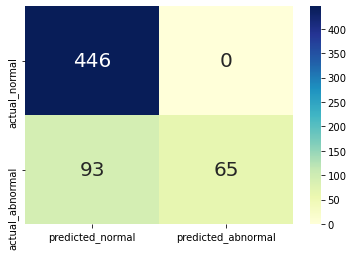

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.851
Precision: 0.989
Recall: 0.41
F1 Score: 0.58


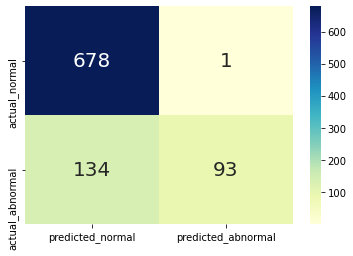

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [15]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.992
Precision: 1.0
Recall: 0.968
F1 Score: 0.984


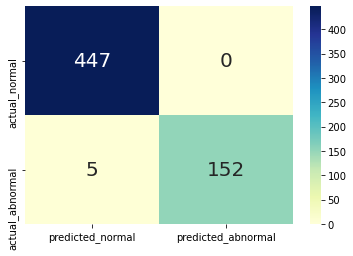

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [29]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.989
Precision: 0.995
Recall: 0.96
F1 Score: 0.977


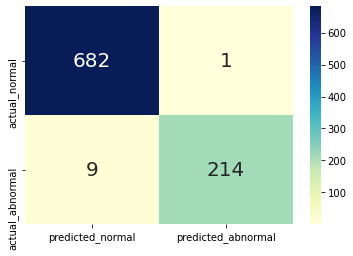

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))